# Author : Aravinth.S


## Data Science and Business Analytics(GRIP June 2021)


## Task 2 : Prediction using Unsupervised ML


## Problem Statement :From the given ‘Iris’ dataset, predict the optimum number of clusters and represent it visually.

**Importing required libraries**

In [3]:
import pandas as pd
from sklearn import datasets
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

**Loading the Datasets**

In [4]:
df = pd.read_csv('Iris.csv')

**Exploratory Data Analysis**

In [5]:
df.head()  

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [13]:
df.describe()  #To check Mean, Median, Standard Deviation, Min., Max. about the columns in data set

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [12]:
df.shape 

(150, 6)

In [11]:
df.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [9]:
df.isnull().any() #checking for any null value

Id               False
SepalLengthCm    False
SepalWidthCm     False
PetalLengthCm    False
PetalWidthCm     False
Species          False
dtype: bool

**Data Visualization**

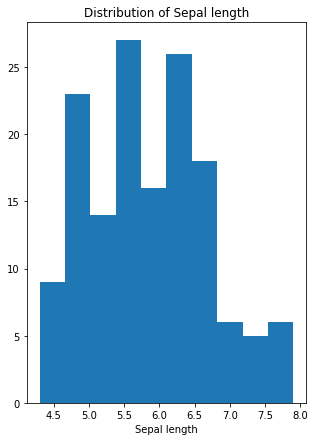

In [193]:
plt.figure(figsize=(5,7))
plt.hist(df['SepalLengthCm'])
plt.title('Distribution of Sepal length')
plt.xlabel('Sepal length')
plt.show()

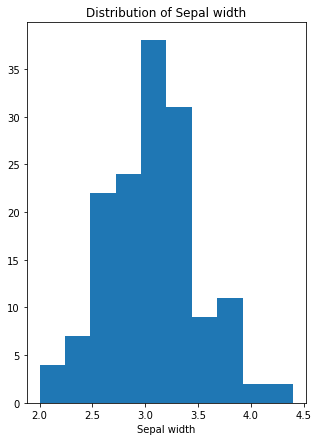

In [15]:
plt.figure(figsize=(5,7))
plt.hist(df['SepalWidthCm'])
plt.title('Distribution of Sepal width')
plt.xlabel('Sepal width')
plt.show()

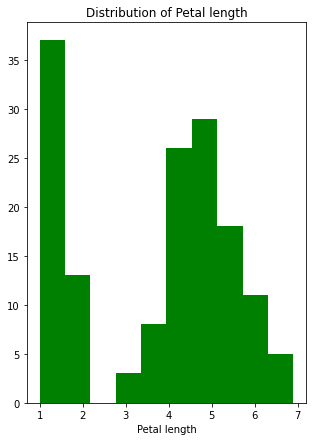

In [194]:
plt.figure(figsize=(5,7))
plt.hist(df['PetalLengthCm'],color = 'green')
plt.title('Distribution of Petal length')
plt.xlabel('Petal length')
plt.show()

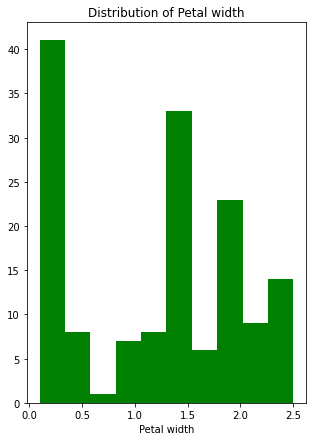

In [17]:
plt.figure(figsize=(5,7))
plt.hist(df['PetalWidthCm'],color = 'green')
plt.title('Distribution of Petal width')
plt.xlabel('Petal width')
plt.show()

In [19]:
df['Species'].unique().tolist()

['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']

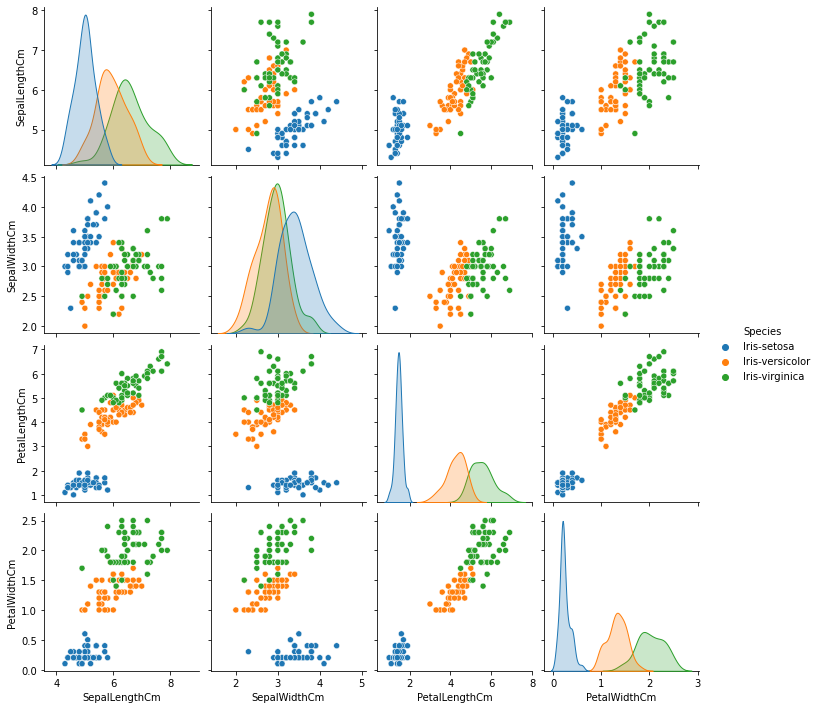

In [196]:
sns.pairplot(df.drop("Id", axis=1), hue="Species")
plt.show()

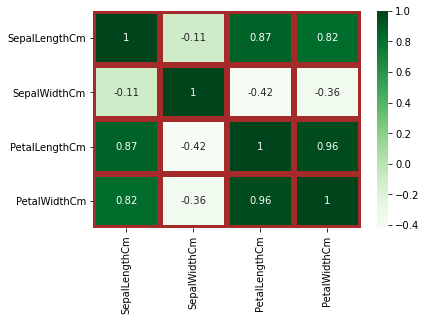

In [22]:
no_id = df.copy()
no_id.drop("Id", axis = 1, inplace = True)
sns.heatmap(no_id.corr(), annot = True,linewidth = 5,linecolor = 'Brown',cbar = True,cmap = 'Greens')  #shows the correlation relationship between variables
plt.show()      

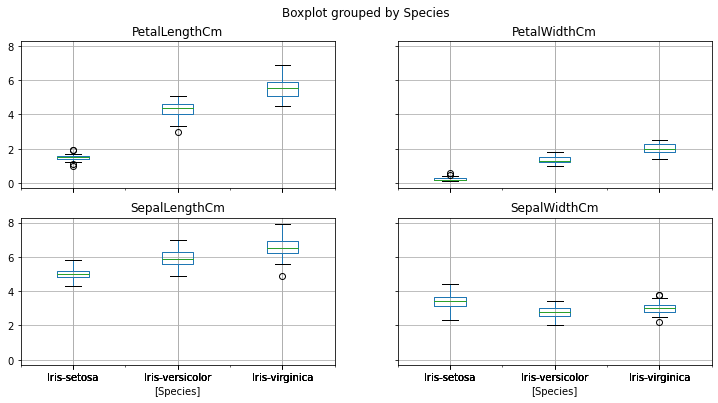

In [198]:
df.drop("Id", axis=1).boxplot(by = "Species", figsize=(12, 6))
plt.show()

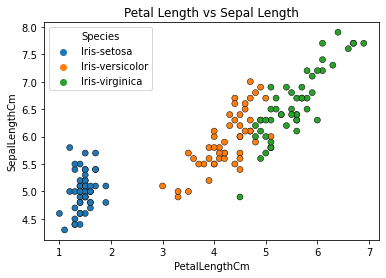

In [218]:
#PetalLength vs SepalLength
sns.scatterplot(x = 'PetalLengthCm', y = 'SepalLengthCm',edgecolor='k', data = df ,hue ='Species')
plt.title('Petal Length vs Sepal Length')
plt.show()

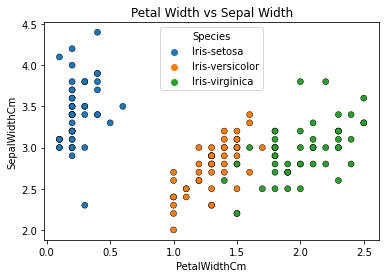

In [217]:
#PetalWidth vs SepalWidth
sns.scatterplot(x = 'PetalWidthCm', y = 'SepalWidthCm',edgecolor='k', data = df ,hue ='Species')
plt.title('Petal Width vs Sepal Width')
plt.show()

**Finding the optimum numbers of clusters for k-means classification.**

In [23]:
x = df.iloc[:, [1,2,3,4]].values

In [24]:
#using elbow method to find the optimal number of clusters
from sklearn.cluster import KMeans
wcss = []                              # Within cluster sum of squares
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)

**WCSS** is defined as the sum of the squared distance between each member of the cluster and its centroid.

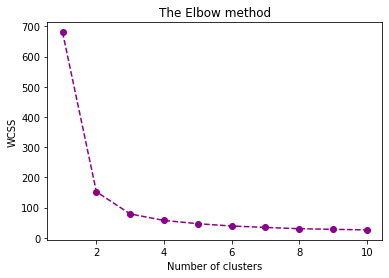

In [25]:
#Plotting the results in a line graph
plt.plot(range(1, 11), wcss, "go--", c ='darkmagenta')
plt.title('The Elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS') 
plt.show()

**We can clearly state from the above graph that the optimum clusters is where the elbow occurs. This is when the within cluster sum of squares (WCSS) doesn't decrease significantly with every iteration.**

Let us take the number of clusters  = 3



In [60]:
#Applying kmeans to the dataset / Creating the kmeans classifier

kmeans = KMeans(n_clusters = 3, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
y_kmeans = kmeans.fit_predict(x)

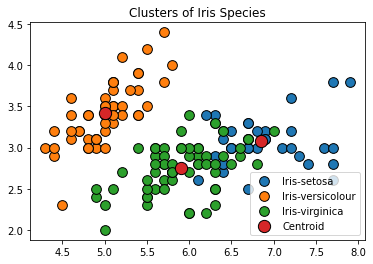

In [27]:
#Visualising the clusters

plt.scatter(x[y_kmeans == 0,0], x[y_kmeans == 0,1], s = 95, edgecolor='k', cmap = 'summer', label = 'Iris-setosa')
plt.scatter(x[y_kmeans == 1,0], x[y_kmeans == 1,1], s = 95, edgecolor='k', cmap = 'summer', label = 'Iris-versicolour')
plt.scatter(x[y_kmeans == 2,0], x[y_kmeans == 2,1], s = 95, edgecolor='k', cmap = 'summer', label = 'Iris-virginica')

centers = kmeans.cluster_centers_
plt.scatter(centers[:,0], centers[:,1], s = 150, edgecolor='k', cmap ='summer', label = 'Centroid')
                                                                
plt.title('Clusters of Iris Species')
plt.legend()
plt.show()

# Atlast we predict that optimum clustering is three and represented it visually.

# -------------------------------------THANK YOU------------------------------------------------